# Assignment - 16 
# Text mining
# Question 2

In [26]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('stopwords') 
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df=pd.read_csv("negative-words.txt",error_bad_lines=False,encoding="latin-1",header=None)
df1=df.drop(df.index[0:26],axis=0)
df1


C:\Users\pc\AppData\Local\Temp\ipykernel_32748\1869767171.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("negative-words.txt",error_bad_lines=False,encoding="latin-1",header=None)
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,0
26,2-faced
27,2-faces
28,abnormal
29,abolish
30,abominable
...,...
4804,zaps
4805,zealot
4806,zealous
4807,zealously


In [28]:
df=pd.read_csv("positive-words.txt",error_bad_lines=False,encoding="latin-1",header=None)
df2=df.drop(df.index[0:26],axis=0)
df2

C:\Users\pc\AppData\Local\Temp\ipykernel_32748\1071601788.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("positive-words.txt",error_bad_lines=False,encoding="latin-1",header=None)
b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,0
26,a+
27,abound
28,abounds
29,abundance
30,abundant
...,...
2027,youthful
2028,zeal
2029,zenith
2030,zest


In [29]:
df=pd.concat([df1,df2],axis=0)
df.columns={'X'}
df

,X
26,2-faced
27,2-faces
28,abnormal
29,abolish
30,abominable
...,...
2027,youthful
2028,zeal
2029,zenith
2030,zest


In [30]:
def calpolarity(x):
    return TextBlob(x).sentiment.polarity


In [31]:
def calSubjectivity(x):
    return TextBlob(x).sentiment.subjectivity

In [32]:
def segmentation(x):
    if x > 0:
        return "positive"
    if x== 0:
        return "neutral"
    else:
        return "negative"

In [33]:
df['polarity']=df["X"].apply(calpolarity)
df['subjectivity']=df["X"].apply(calSubjectivity)
df['segmentation']=df["polarity"].apply(segmentation)


In [34]:
df.head()

,X,polarity,subjectivity,segmentation
26,2-faced,0.0,0.0,neutral
27,2-faces,0.0,0.0,neutral
28,abnormal,0.0,0.0,neutral
29,abolish,0.0,0.0,neutral
30,abominable,0.0,0.0,neutral


In [35]:
df.pivot_table(index=['segmentation'],aggfunc={"segmentation":'count'})

,segmentation
segmentation,
negative,441
neutral,5908
positive,440


total 441 negative,5908 neutral and 440 positive words are there

In [36]:
df = [X.strip() for X in df.X] 

In [37]:
book = [X for X in df if X] 
book[0:10]


['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [38]:
text = ' '.join(book)
text 

'2-faced 2-faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absent-minded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate acerbic acerbically ache ached aches achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting addicts admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agonies agonize agonizing agonizingly agony aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allegations allege alle

In [39]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text


'2faced 2faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absentminded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate acerbic acerbically ache ached aches achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting addicts admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agonies agonize agonizing agonizingly agony aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allegations allege allergi

# Tokenization

In [40]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])


['2faced', '2faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absentminded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness']


# Removing Stop words

In [41]:
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]


In [42]:
lower_words = [X.lower() for X in no_stop_tokens]
print(lower_words[0:40])


['2faced', '2faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absentminded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate']


# stemming

In [43]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:10])


['2face', '2face', 'abnorm', 'abolish', 'abomin', 'abomin', 'abomin', 'abomin', 'abort', 'abort']


# Lemmatization

In [44]:
import spacy
nlp=spacy.load("en_core_web_sm")
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])


2faced 2faces abnormal abolish abominable abominably abominate abomination abort aborted aborts abrade abrasive abrupt abruptly abscond absence absentminded absentee absurd absurdity absurdly absurdness abuse abused abuses abusive abysmal abysmally abyss accidental accost accursed accusation accusations accuse accuses accusing accusingly acerbate


In [45]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])


['2faced', '2faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'abort', 'abort', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absentminde', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abuse']


# Feature Extraction

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)
print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])
print(X.toarray().shape)

{'2face': 0, 'abnorm': 1, 'abolish': 2, 'abomin': 3, 'abort': 4, 'abrad': 6, 'abras': 7, 'abrupt': 8, 'abruptli': 9, 'abscond': 10, 'absenc': 11, 'absentmind': 13, 'absente': 12, 'absurd': 14, 'absurdli': 15, 'abus': 17, 'abysm': 18, 'abyss': 19, 'accident': 21, 'accost': 28, 'accurs': 30, 'accus': 31, 'accusingli': 32, 'acerb': 33, 'ach': 34, 'achey': 35, 'acrid': 37, 'acridli': 38, 'acrimoni': 39, 'adam': 41, 'adamantli': 42, 'addict': 44, 'admonish': 49, 'admonishingli': 50, 'admonit': 51, 'adulter': 58, 'adulteri': 59, 'adversari': 65, 'advers': 64, 'afflict': 72, 'affront': 76, 'afraid': 78, 'aggrav': 79, 'aggress': 80, 'aggressor': 81, 'aggriev': 82, 'aggriv': 83, 'aghast': 84, 'agoni': 87, 'agon': 86, 'agonizingli': 88, 'aground': 90, 'ail': 91, 'ailment': 92, 'aimless': 93, 'alarm': 94, 'alarmingli': 95, 'alien': 96, 'alleg': 98, 'allerg': 99, 'allergi': 100, 'aloof': 103, 'alterc': 104, 'ambigu': 108, 'ambival': 110, 'ambush': 111, 'amiss': 117, 'amput': 121, 'anarch': 124, 'a

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
# Bigrams and Trigrams 
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)
bow_matrix_ngram
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['all', 'anti', 'attack', 'attacks', 'awe', 'awful', 'back', 'balanced', 'best', 'better', 'break', 'broken', 'bull', 'cheap', 'class', 'confidence', 'cost', 'counter', 'criticism', 'cure', 'dead', 'destructive', 'down', 'drop', 'easy', 'educated', 'effective', 'efficient', 'envious', 'enviously', 'enviousness', 'err', 'eye', 'famous', 'farcical', 'fast', 'fastest', 'fat', 'favored', 'first', 'free', 'friendly', 'god', 'growing', 'hard', 'hearted', 'heavy', 'hell', 'high', 'honored', 'hum', 'humiliation', 'ill', 'issue', 'jaw', 'known', 'like', 'long', 'low', 'martyrdom', 'multi', 'non', 'off', 'out', 'over', 'pain', 'priced', 'problem', 'productive', 'provocative', 'replaceable', 'respect', 'retarded', 'rich', 'rip', 'risk', 'run', 'saving', 'screwed', 'self', 'sharp', 'slow', 'spirited', 'spoon', 'sufficient', 'sugar', 'terror', 'threatening', 'thumb', 'thumbs', 'time', 'toll', 'top', 'trouble', 'two', 'ultra', 'up', 'viewable', 'well', 'worth']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


In [48]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [49]:
def plot_cloud(wordcloud):
    
    plt.figure(figsize=(15, 30))
    
    plt.imshow(wordcloud) 
    
    plt.axis("off");

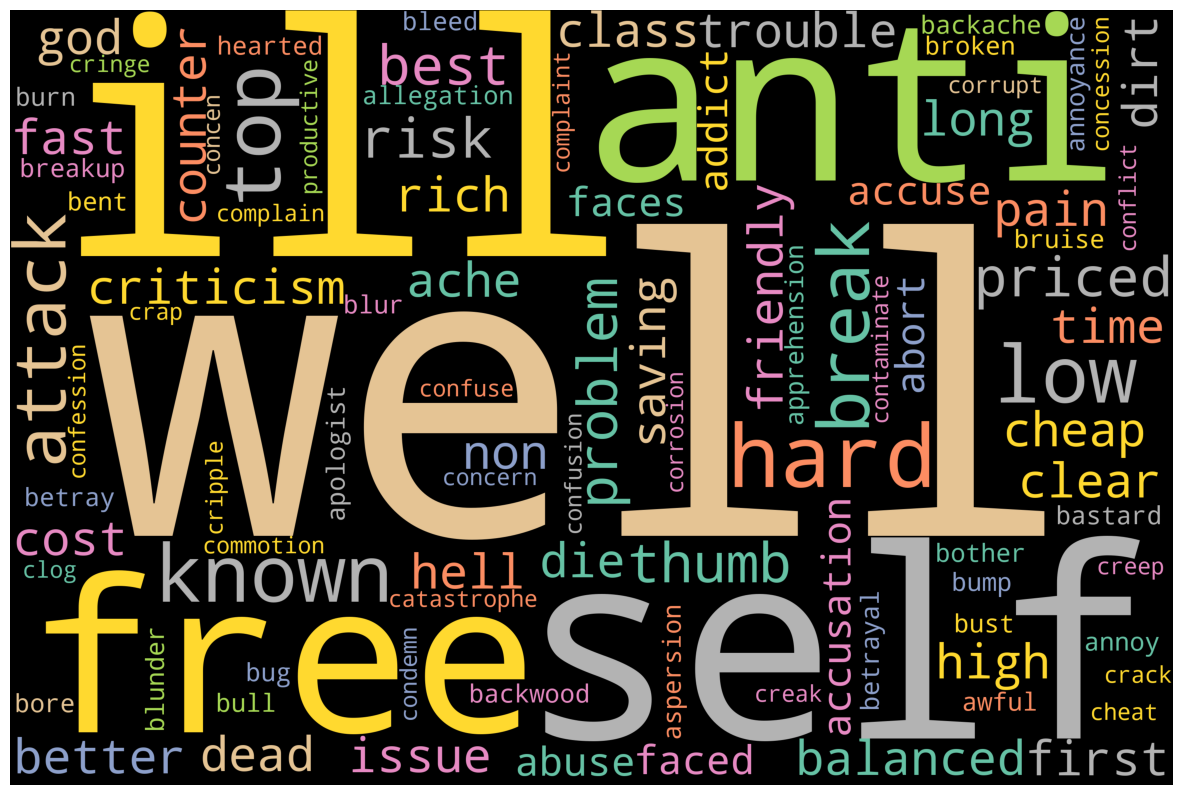

In [50]:
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2').generate(text)
plot_cloud(wordcloud)
plt.show()